# Exploratory Data Analysis

Importing libraries.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import datetime
import calendar
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns

Importing csv file.

In [3]:
df = pd.read_csv('liver_final.csv')

In [4]:
df.shape

(378, 12)

Let's find out the null values in our dataset.

In [5]:
df.isnull().sum()

id                  0
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

Let's find out the type of data in our dataset.

In [7]:
df.dtypes

id                    int64
age                   int64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
dtype: object

Now let's find out who are patient or not with respect to age.

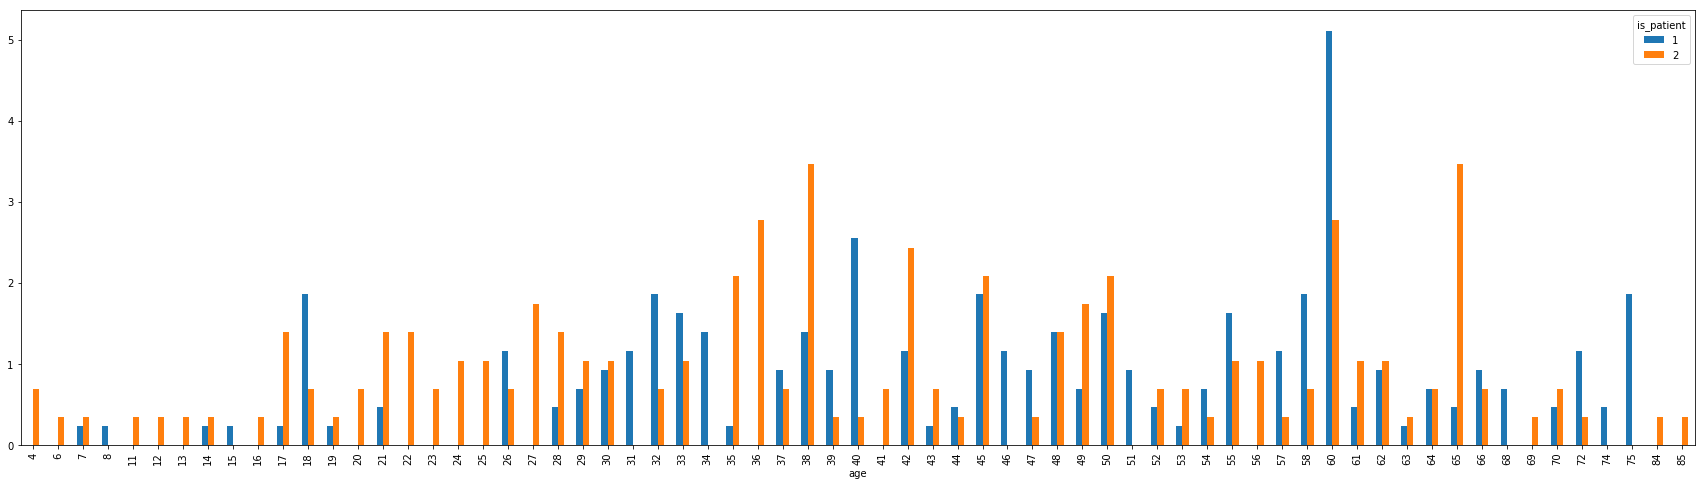

In [10]:
plt.rcParams['figure.figsize'] = (30, 8)
d = df.groupby(['age', 'is_patient']).size().unstack(level=1)
d = d / d.mean()
p = d.plot(kind='bar')

In our dataset, data is distributed evenly over all ages. Highest number of patients are recorder at age 38 and 65. Highest age of not patient is at age = 60.

Let's find out how patients are divided over gender.

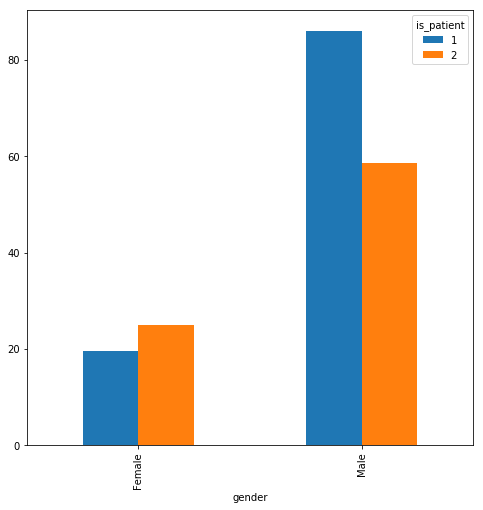

In [18]:
plt.rcParams['figure.figsize'] = (8, 8)
d = df.groupby(['gender', 'is_patient']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

In our dataset, number of female with disease are more as compared to completely well female. Number of male with disease is less than those who are well.

Finding co-relation between columns.

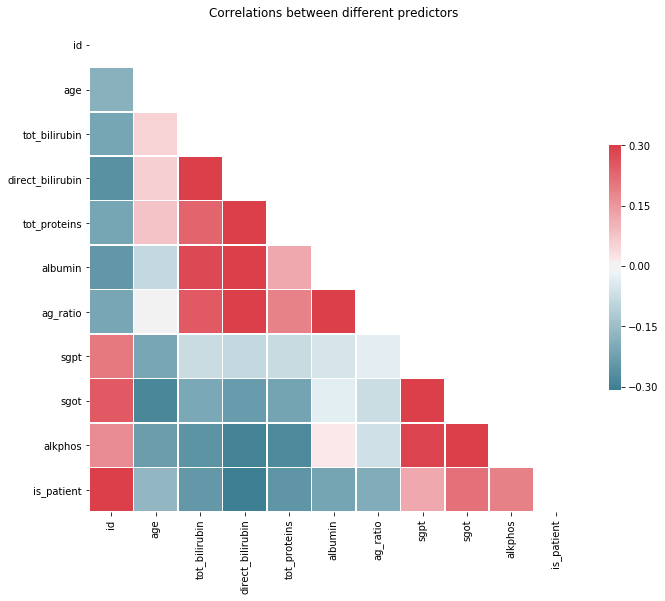

In [19]:
corr_df = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

From the heat map, we can understand the data is evenly distributed. Columns like 'direct_billrubin' and 'tot_protein' have values on higher side as compared to otehr columns.

EDA is also continued in Tableau. Link for them are mentioned below.

https://public.tableau.com/profile/nitin.prince.reuben#!/vizhome/EDA_liver/Dashboard1?publish=yes